## Breast Histopathology Images


Las imágenes proporcionadas en https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images/data tienen una dimensión de 50x50 y están a color (RGB).

In [1]:
import os
import zipfile
import random
import shutil
import glob
import numpy as np
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from PIL import Image
import keras.utils as image
import cv2

## Loading Dataset

In [3]:
breast_imgs = glob.glob('Data/IDC_regular_ps50_idx5/**/**.png', recursive = True)

In [4]:
for imgname in breast_imgs[:5]:
    print(imgname) 

Data/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
Data/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
Data/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png
Data/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1151_class0.png
Data/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1201_class0.png


## Visualizing Dataset

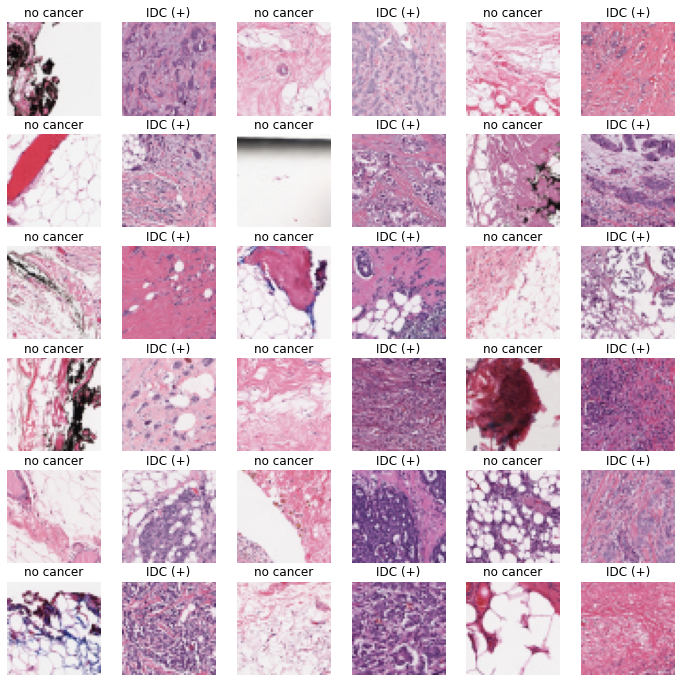

In [5]:
N_IDC = []
P_IDC = []

for img in breast_imgs:
    if img[-5] == '0' :
        N_IDC.append(img)
    
    elif img[-5] == '1' :
        P_IDC.append(img)
plt.figure(figsize = (12, 12))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

s = 0
for num in some_non:
    
        img = image.load_img((N_IDC[num]), target_size=(50, 50))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:
    
        img = image.load_img((P_IDC[num]), target_size=(50, 50))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1
        
plt.savefig('images_plot.png')

In [12]:
# Seleccionar una muestra equilibrada de imágenes sin cáncer
random.seed(1)
non_cancer_sample = random.sample(N_IDC, min(len(N_IDC),100000))

non_cancer_num = len(non_cancer_sample)
cancer_num = len(P_IDC) 
total_img_num = non_cancer_num + cancer_num

# Mostrar 
print('Número de imágenes sin cáncer: {}'.format(non_cancer_num))
print('Número de imágenes con cáncer: {}'.format(cancer_num))
print('Total de imágenes: {}'.format(total_img_num))

Número de imágenes sin cáncer: 100000
Número de imágenes con cáncer: 78786
Total de imágenes: 178786


In [8]:
carpeta_nocancer = 'no-cancer/'
carpeta_cancer = 'cancer/'

os.makedirs(carpeta_cancer, exist_ok=True)
os.makedirs(carpeta_nocancer, exist_ok=True)

In [9]:
import shutil

for img in P_IDC:
    shutil.copy(img, carpeta_cancer)
for img in non_cancer_sample:
    shutil.copy(img, carpeta_nocancer)

In [10]:
random.seed(1)
cancer_sample = random.sample(P_IDC, 5000)
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Generar imágenes aumentadas y guardarlas en el directorio de salida
for img_path in cancer_sample:
    img = Image.open(img_path)  
    img = img.resize((50, 50))  
    img_array = np.array(img)
    img_array = img_array.reshape((1,) + img_array.shape)

    i = 0
    for batch in datagen.flow(img_array, batch_size=1, 
                              save_to_dir=carpeta_cancer, 
                              save_prefix=os.path.basename(img_path),
                              save_format='png'):
        i += 1
        if i >= 4:  
            break
            ii

In [13]:
imagenes_carpeta_cancer = glob.glob('cancer/**.png', recursive = True)
imagenes_carpeta_nocancer = glob.glob('no-cancer/**.png', recursive = True)

print('Imágenes de carpeta cancer: {}' .format(len(imagenes_carpeta_cancer)))
print('Imágenes de carpeta no-cancer: {}' .format(len(imagenes_carpeta_nocancer)))

Imágenes de carpeta cancer: 98782
Imágenes de carpeta no-cancer: 100000


In [14]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

In [15]:
entrenamiento_cancer = 'entrenamiento/cancer/'
entrenamiento_nocancer = 'entrenamiento/nocancer/'
test_cancer = 'test/cancer/'
test_nocancer = 'test/nocancer/'

In [16]:
os.makedirs(entrenamiento_cancer, exist_ok=True)
os.makedirs(entrenamiento_nocancer, exist_ok=True)
os.makedirs(test_cancer, exist_ok=True)
os.makedirs(test_nocancer, exist_ok=True)

In [17]:
split_size = 0.8
random.seed(1)
split_data(carpeta_cancer, entrenamiento_cancer, test_cancer, split_size)
split_data(carpeta_nocancer, entrenamiento_nocancer, test_nocancer, split_size)

In [66]:
datos_entrenamiento_cancer = glob.glob('entrenamiento/cancer/**.png', recursive = True)
datos_entrenamiento_nocancer = glob.glob('entrenamiento/nocancer/**.png', recursive = True)
datos_test_cancer = glob.glob('test/cancer/**.png', recursive = True)
datos_test_nocancer = glob.glob('test/nocancer/**.png', recursive = True)


print('Imágenes de entrenamiento con cancer: {}' .format(len(datos_entrenamiento_cancer)))
print('Imágenes de entrenamiento sin cancer: {}' .format(len(datos_entrenamiento_nocancer)))
print('Imágenes de entrenamiento total: {}' .format(len(datos_entrenamiento_nocancer)+len(datos_entrenamiento_cancer)))
print('Imágenes de test sin cancer: {}' .format(len(datos_test_cancer)))
print('Imágenes de test con cancer: {}' .format(len(datos_test_nocancer)))
print('Imágenes de test total: {}' .format(len(datos_test_nocancer)+len(datos_test_cancer)))

Imágenes de entrenamiento con cancer: 79025
Imágenes de entrenamiento sin cancer: 80000
Imágenes de entrenamiento total: 159025
Imágenes de test sin cancer: 19757
Imágenes de test con cancer: 20000
Imágenes de test total: 39757


In [3]:
TRAINING_DIR = "entrenamiento/"
 
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=128,
                                                    class_mode='binary',
                                                    target_size=(50, 50))

VALIDATION_DIR = "test/"

validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=128,
                                                              class_mode='binary',
                                                              target_size=(50, 50))


Found 159025 images belonging to 2 classes.
Found 39757 images belonging to 2 classes.


## Modelo CNN

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,  MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

from keras import metrics

In [7]:
checkpoint = ModelCheckpoint('Pesos/Modelo1/pesos_del_modelo_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)
early_stop=EarlyStopping(monitor='val_loss',patience=5)

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy', metrics.Recall()])


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 64)         

In [12]:
history = model.fit(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data = validation_generator, callbacks = [early_stop,checkpoint])

Epoch 1/100
1243/1243 [==============================] - 1473s 1s/step - loss: 0.4708 - accuracy: 0.7843 - recall_1: 0.7936 - val_loss: 0.4284 - val_accuracy: 0.8041 - val_recall_1: 0.8608
Epoch 2/100
1243/1243 [==============================] - 453s 364ms/step - loss: 0.4138 - accuracy: 0.8159 - recall_1: 0.8226 - val_loss: 0.3846 - val_accuracy: 0.8318 - val_recall_1: 0.8504
Epoch 3/100
1243/1243 [==============================] - 506s 407ms/step - loss: 0.3884 - accuracy: 0.8309 - recall_1: 0.8349 - val_loss: 0.3966 - val_accuracy: 0.8247 - val_recall_1: 0.8051
Epoch 4/100
1243/1243 [==============================] - 403s 324ms/step - loss: 0.3749 - accuracy: 0.8367 - recall_1: 0.8396 - val_loss: 0.3603 - val_accuracy: 0.8418 - val_recall_1: 0.8377
Epoch 5/100
1243/1243 [==============================] - 354s 285ms/step - loss: 0.3666 - accuracy: 0.8422 - recall_1: 0.8453 - val_loss: 0.3854 - val_accuracy: 0.8334 - val_recall_1: 0.8130
Epoch 6/100
1243/1243 [========================

Epoch 44/100
1243/1243 [==============================] - 307s 247ms/step - loss: 0.3019 - accuracy: 0.8723 - recall_1: 0.8741 - val_loss: 0.2889 - val_accuracy: 0.8771 - val_recall_1: 0.8711
Epoch 45/100
1243/1243 [==============================] - 309s 249ms/step - loss: 0.3006 - accuracy: 0.8725 - recall_1: 0.8757 - val_loss: 0.2913 - val_accuracy: 0.8756 - val_recall_1: 0.8672
Epoch 46/100
1243/1243 [==============================] - 312s 251ms/step - loss: 0.3015 - accuracy: 0.8715 - recall_1: 0.8741 - val_loss: 0.2891 - val_accuracy: 0.8764 - val_recall_1: 0.8875
Epoch 47/100
1243/1243 [==============================] - 311s 250ms/step - loss: 0.3017 - accuracy: 0.8727 - recall_1: 0.8748 - val_loss: 0.2908 - val_accuracy: 0.8770 - val_recall_1: 0.8806
Epoch 48/100
1243/1243 [==============================] - 306s 246ms/step - loss: 0.3004 - accuracy: 0.8726 - recall_1: 0.8753 - val_loss: 0.2960 - val_accuracy: 0.8737 - val_recall_1: 0.8506


In [4]:
import math

def load_and_preprocess_images(image_paths, labels):
    images = []
    s=0
    ncat = math.floor(len(image_paths)/10)
    for path in image_paths:
        # Load image using PIL or any other library
        img = Image.open(path)
        # Resize and preprocess the image as needed
        img = img.resize((50, 50))
        img = np.array(img) / 255.0  # Normalize pixel values to be between 0 and 1
        images.append(img)
        s+=1
        if s%ncat == 0:
            print("completado")


    return np.array(images), np.array(labels)

In [5]:
test_imgs_1 = glob.glob('test/cancer/*.png', recursive = True)

prueba1,label1 = load_and_preprocess_images(test_imgs_1,[0]*len(test_imgs_1))

test_imgs_0 = glob.glob('test/nocancer/*.png', recursive = True)
prueba0,label0= load_and_preprocess_images(test_imgs_0,[1]*len(test_imgs_0))

completado
completado
completado
completado
completado
completado
completado
completado
completado
completado
completado
completado
completado
completado
completado
completado
completado
completado
completado
completado


In [9]:
test_images = np.concatenate((prueba0, prueba1), axis=0)
true_labels = np.concatenate((label0, label1), axis=0)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
pesos = model.load_weights('Pesos/Modelo1/pesos_del_modelo_epoch_48.h5')

In [11]:
Y_pred = model.predict(test_images)

1243/1243 [==============================] - 14s 11ms/step


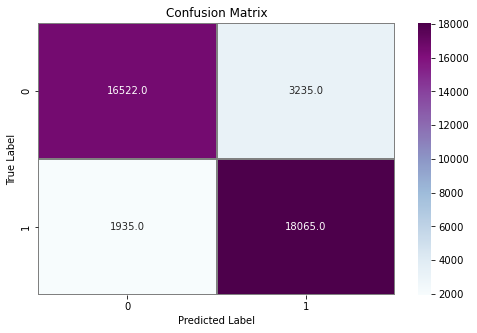

<Figure size 432x288 with 0 Axes>

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predicted_labels = (Y_pred > 0.35).astype(int)
confusion_mat = confusion_matrix(true_labels, predicted_labels)
confusion_mat

f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mat, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('images_plot.png')

In [13]:
VP=confusion_mat[0][0]
VN=confusion_mat[1][1]
FP=confusion_mat[0][1]
FN=confusion_mat[1][0]

In [14]:
recall = VP/(VP+FN)
precision = VP/(VP+FP)
accuracy = (VP+VN)/(VP+VN+FP+FN)

print(accuracy)
print(precision)
print(recall)

0.8699600070427849
0.8362605658753859
0.895161727257951


In [22]:
a = model.predict(test_images[0:1])
a

1/1 [==============================] - 0s 29ms/step


array([[0.8814349]], dtype=float32)

In [19]:
import gradio as gr
import numpy as np
from PIL import Image

# Assuming your model is already loaded and named 'model'

# Replace 'model' with your actual model
def preprocess_image(image):
    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Resize the image to the expected dimensions (50x50 pixels)
    resized_image = np.array(Image.fromarray(image_array).resize((50, 50)))

    # Normalize pixel values to the range [0, 1]
    normalized_image = resized_image / 255.0

    # You can add additional preprocessing steps here if needed

    return normalized_image

def predict_image(image):
    # Preprocess the input image
    preprocessed_image = preprocess_image(image)

    # Make predictions using the model
    prediction = model.predict(np.expand_dims(preprocessed_image, axis=0))[0][0]
    label = "Positive" if 1-prediction>0.4 else "Negative"

    return f'Prediction: {1-prediction:.2} - Label: {label}'

# Gradio Interface
iface = gr.Interface(fn=predict_image, inputs="image", outputs="text")
iface.launch()

Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 27ms/step


## Modelo preentrenado

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# crea el modelo pre-entrenado base_model desde Keras
from tensorflow.keras.applications import DenseNet201

base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(50, 50, 3))
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

x = base_model.output
x = GlobalAveragePooling2D()(x)
# Agrega una capa densa
x = Dense(256, activation='relu')(x)
# y una capa logística -- 2 clases
predictions = Dense(1, activation='sigmoid')(x)

# Este es el modelo que entrenaremos
model = Model(inputs=base_model.input, outputs=predictions)

# compilar el modelo (debe hacerse después de configurar las capas como no entrenables)
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', metrics.Recall()])

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
model.summary()

In [ ]:
# Flujo de imágenes de entrenamiento in batches of 256 usando el generador train_datagen
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 256,
                                                    class_mode = 'binary',
                                                    target_size = (50, 50))

# Flujo de imágenes de entrenamiento in batches of 256 usando el generador test_datagen generator
validation_generator =  validation_datagen.flow_from_directory( VALIDATION_DIR,
                                                          batch_size  = 256,
                                                          class_mode  = 'binary',
                                                          target_size = (50, 50))

In [ ]:
# entrenar el modelo con los nuevos datos durante algunas épocas
history_0 = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 20,
            verbose = 1)

In [ ]:
import matplotlib.pyplot as plt
acc = history_0.history['accuracy']
val_acc = history_0.history['val_accuracy']
loss = history_0.history['loss']
val_loss = history_0.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
